	
Phase II: Data Curation, Exploratory Analysis and Plotting

Walmart Competitve Advantage

Baer Istok
Fiona Donohue
Harshini Moon
Evelyn Fabel
Project Goal:
Our project looks at solar flares and will explore solar flare data supplied by NASA to try and determine the relationship, if there is any, between the length of a given flare, when the peak occures during that time, and what class type it is.

Specifically, we want to know if longer flares are in higher classes, and how far into the flare peak times tend to occur. We are using data from NASA's DONKI api with a focus on solar flares.

Pipeline Overview:
To get the data from the solar flare api:

We use a url with our api key and a starting and ending date
We use get(url) to retrieve the data from the url.
The queries are then stored in a list, 'data', and then translated into a dataframe

## 0. Gathering the Data

In [82]:
import requests

import pandas as pd

api_key = 'f2asD6aVakycwYB4bQd6ANE3shr74umMDWTurH5x'
end_date = '2024-10-20'
start_date = '2024-09-20'


url = f'https://api.nasa.gov/DONKI/FLR?startDate={start_date}&endDate={end_date}&api_key={api_key}'

# Retrieves the data
response = requests.get(url)

# Stores the retreived data in a list
data = response.json()

## 1. Cleaning the Data

In [84]:
from datetime import datetime

# Converting the list of data into a dataframe
df = pd.DataFrame(data)

# Removing the excess data
df = df.drop(columns=['instruments', 'sourceLocation', 'activeRegionNum',
                      'note', 'submissionTime', 'versionId', 'link', 'linkedEvents'], axis=1)

# Removing the numerical aspect of the class type so that it can be more categorical
# Can be X-class, M-class, or C-class
df['classType'] = df['classType'].apply(lambda x: x[:1])

# Converting the time strings into datetime objects
df['beginTime'] = df['beginTime'].apply(lambda x: datetime.fromisoformat(x))
df['peakTime'] = df['peakTime'].apply(lambda x: datetime.fromisoformat(x))
df['endTime'] = df['endTime'].apply(lambda x: datetime.fromisoformat(x))

# Determining the length of each solarflare
df['length'] = df['endTime'] - df['beginTime']

# When the peak occured over the course of the solar flare on a scale from 0 to 1
# I. e. if a peak occurs closer to the beginning of the flare it is closer to 0
df['peakPosition'] = (df['peakTime'] - df['beginTime']) / df['length']

# Cleaning the categorical data for analysis
df = pd.get_dummies(df, columns=['classType'], dtype='float')


df.head(15)

,flrID,beginTime,peakTime,endTime,length,peakPosition,classType_C,classType_M,classType_X
0,2024-09-22T21:12:00-FLR-001,2024-09-22 21:12:00+00:00,2024-09-22 21:39:00+00:00,2024-09-22 22:05:00+00:00,0 days 00:53:00,0.509434,0.0,1.0,0.0
1,2024-09-23T14:23:00-FLR-001,2024-09-23 14:23:00+00:00,2024-09-23 14:56:00+00:00,2024-09-23 15:34:00+00:00,0 days 01:11:00,0.464789,0.0,1.0,0.0
2,2024-09-25T22:57:00-FLR-001,2024-09-25 22:57:00+00:00,2024-09-25 23:12:00+00:00,2024-09-25 23:23:00+00:00,0 days 00:26:00,0.576923,0.0,1.0,0.0
3,2024-09-26T19:41:00-FLR-001,2024-09-26 19:41:00+00:00,2024-09-26 19:49:00+00:00,2024-09-26 19:54:00+00:00,0 days 00:13:00,0.615385,1.0,0.0,0.0
4,2024-09-26T22:58:00-FLR-001,2024-09-26 22:58:00+00:00,2024-09-26 23:12:00+00:00,2024-09-26 23:20:00+00:00,0 days 00:22:00,0.636364,0.0,1.0,0.0
5,2024-09-29T05:26:00-FLR-001,2024-09-29 05:26:00+00:00,2024-09-29 06:11:00+00:00,2024-09-29 06:48:00+00:00,0 days 01:22:00,0.548780,1.0,0.0,0.0
6,2024-09-29T12:49:00-FLR-001,2024-09-29 12:49:00+00:00,2024-09-29 12:53:00+00:00,2024-09-29 12:58:00+00:00,0 days 00:09:00,0.444444,0.0,1.0,0.0
7,2024-09-29T14:09:00-FLR-001,2024-09-29 14:09:00+00:00,2024-09-29 14:24:00+00:00,2024-09-29 14:31:00+00:00,0 days 00:22:00,0.681818,0.0,1.0,0.0
8,2024-09-29T14:31:00-FLR-001,2024-09-29 14:31:00+00:00,2024-09-29 14:41:00+00:00,2024-09-29 14:46:00+00:00,0 days 00:15:00,0.666667,0.0,1.0,0.0
9,2024-09-30T23:37:00-FLR-001,2024-09-30 23:37:00+00:00,2024-09-30 23:59:00+00:00,2024-10-01 00:23:00+00:00,0 days 00:46:00,0.478261,0.0,1.0,0.0


## 3. Exploratory Analysis

In [40]:
# This is the exploratory analysis for data, will find the correlation of different data sets
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

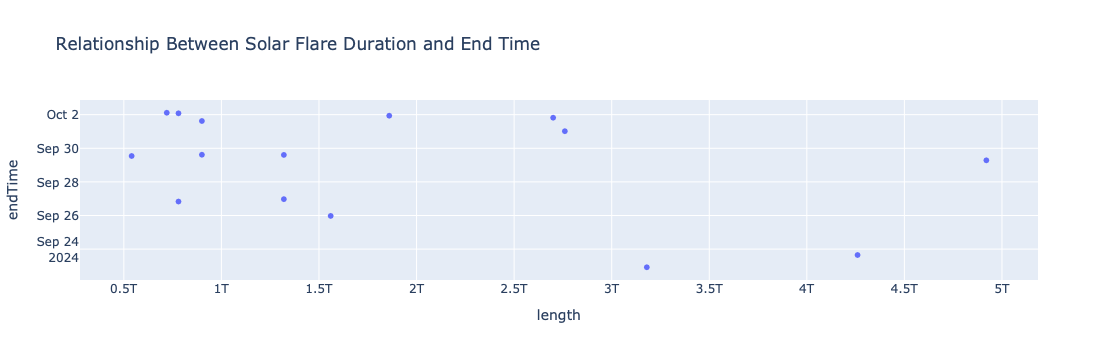

In [76]:
px.scatter(df.head(15), x='length', y='endTime', title = 'Relationship Between Solar Flare Duration and End Time')

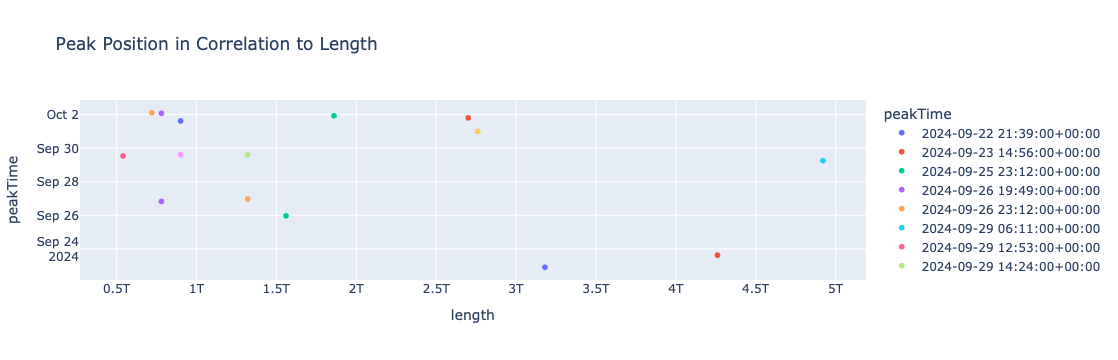

In [77]:
## This is a scatterplot comparing the length and the peak time of 
px.scatter(data_frame=df.head(15), x='length', y='peakTime', color='peakTime', title = 'Peak Position in Correlation to Length')

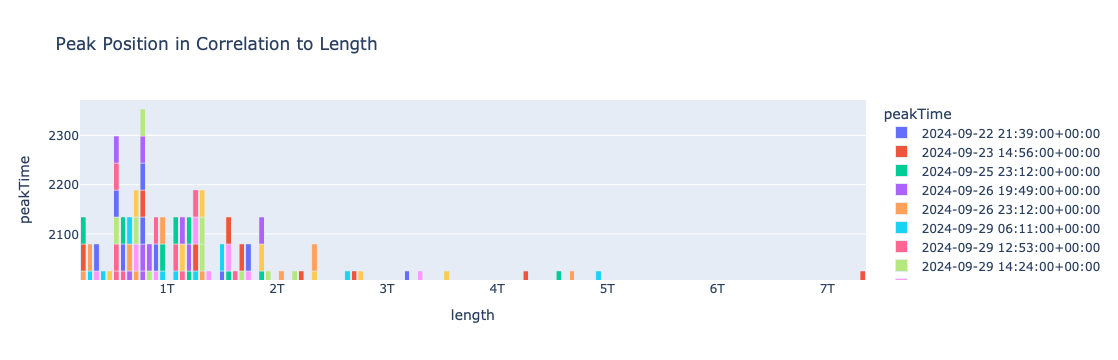

In [74]:
## This is a bar graph comparing the length and the peak time 
px.bar(data_frame=df, x='length', y='peakTime', color='peakTime', title = 'Peak Position in Correlation to Length')

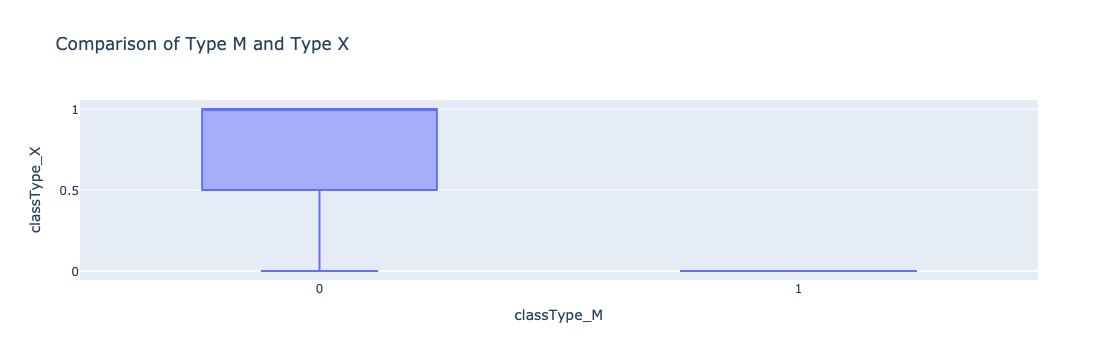

In [68]:
## This is a box plot comparing the class type M and the class type X.
px.box(df, x='classType_M', y='classType_X', title = 'Comparison of Type M and Type X')

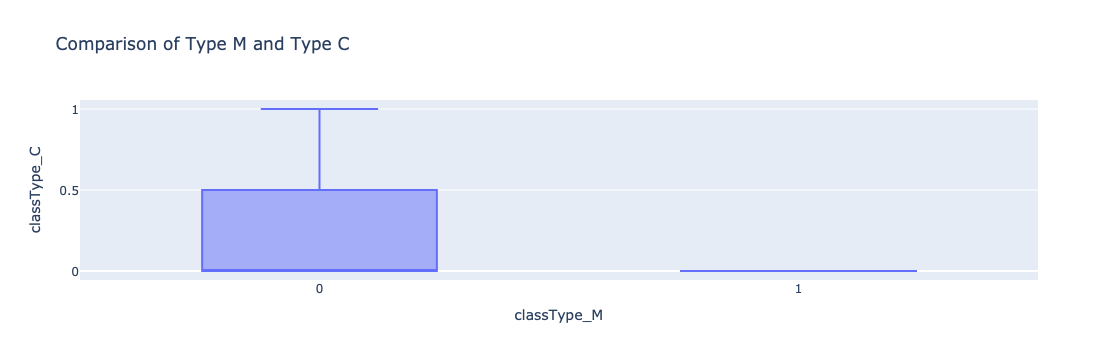

In [70]:
## This is a box plot comparing the class type C and the class type M.
px.box(df, x='classType_M', y='classType_C', title = 'Comparison of Type M and Type C')

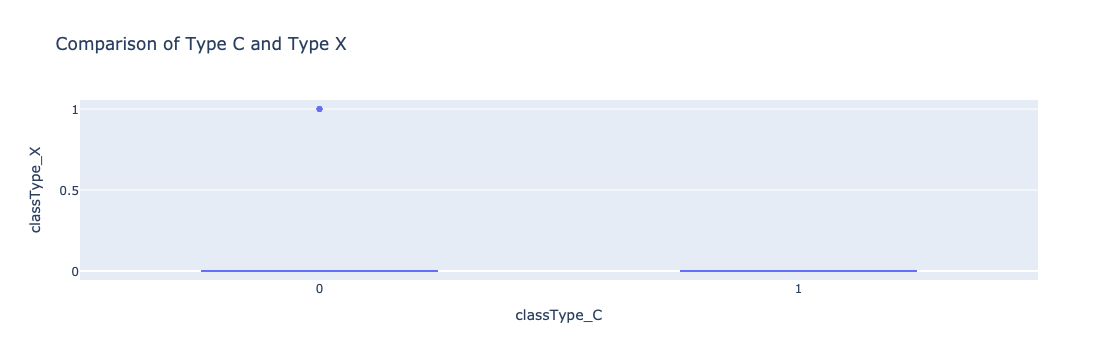

In [72]:
## This is a box plot comparing the class type C and the class type X.
px.box(df, x='classType_C', y='classType_X', title = 'Comparison of Type C and Type X')

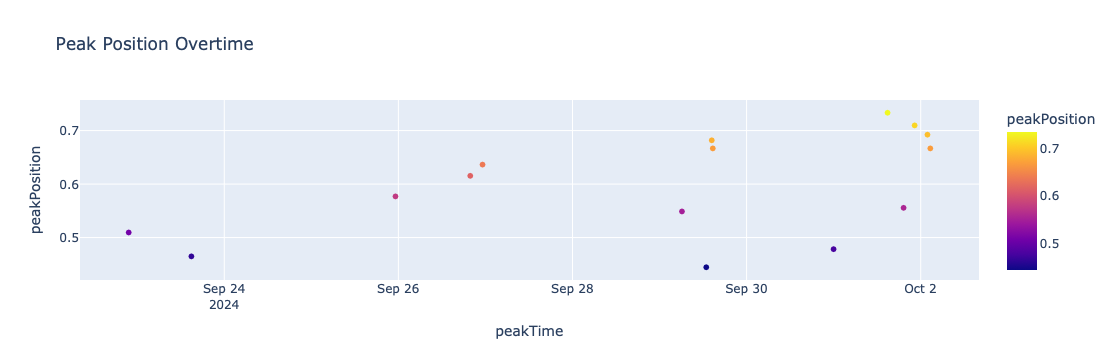

In [66]:
## This is a scatterplot that takes in 15 rows and compares peak time and peak position.
px.scatter(df.head(15), x='peakTime', y='peakPosition', color='peakPosition', title = 'Peak Position Overtime')

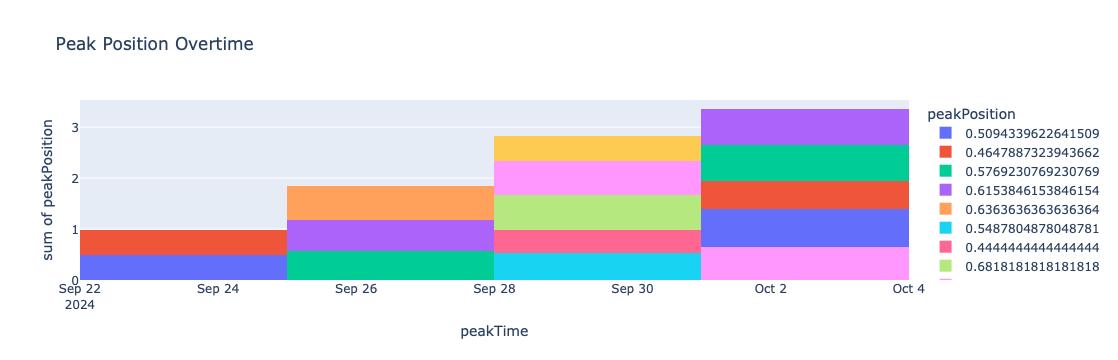

In [87]:
## This is a histogram that takes in 15 rows and compares peak time and peak position.
px.histogram(df.head(15), x='peakTime', y='peakPosition', color='peakPosition', title = 'Peak Position Overtime')